In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import cv2
import matplotlib.pyplot as plt
import os
import glob as gb

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras .layers import Dense,Activation,MaxPooling2D,Conv2D,Flatten,Dropout,BatchNormalization

In [2]:
trainPath=r"/kaggle/input/leukemia-classification/C-NMC_Leukemia/training_data"

In [3]:
for folder in  os.listdir(trainPath ) : 
    trainFolder=  r"/kaggle/input/leukemia-classification/C-NMC_Leukemia/training_data"+'/'+folder
    for f in os.listdir(trainFolder ):
        files = gb.glob(pathname= str( trainFolder +'/' + f +'/*.bmp'))
        print(f'For training data , found {len(files)} in folder {f}')

For training data , found 2397 in folder all
For training data , found 1130 in folder hem
For training data , found 2418 in folder all
For training data , found 1163 in folder hem
For training data , found 2457 in folder all
For training data , found 1096 in folder hem


In [4]:
All=[]
Hem=[]
for folder in  os.listdir(trainPath ) : 
    trainFolder=  r"/kaggle/input/leukemia-classification/C-NMC_Leukemia/training_data"+'/'+folder
    for f in os.listdir(trainFolder ):
        files = gb.glob(pathname= str( trainFolder +'/' + f +'/*.bmp'))
        
        if (f=='all'):
            All.extend(files);
        else:

            Hem.extend(files)
All = np.array(All)
Hem = np.array(Hem)
            
print(len(All))
print(len(Hem))

7272
3389


In [5]:
Image = []
Label = []

for i in range(0, len(All)):
    img = cv2.imread(All[i])
    img = cv2.resize(img, (128,128))
    Image.append(img)
    Label.append(1)
    
for i in range(0, len(Hem)):
    img = cv2.imread(Hem[i])
    img =cv2. resize(img, (128,128))
    Image.append(img)
    Label.append(0)
    
Image = np.array(Image)
Label = np.array(Label)

Image.shape, Label.shape

((10661, 128, 128, 3), (10661,))

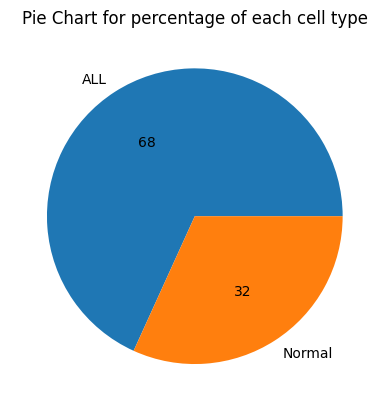

In [6]:
plt.pie([len(All),len(Hem)],labels=["ALL","Normal"],autopct='%.f')
plt.title('Pie Chart for percentage of each cell type')
plt.show()

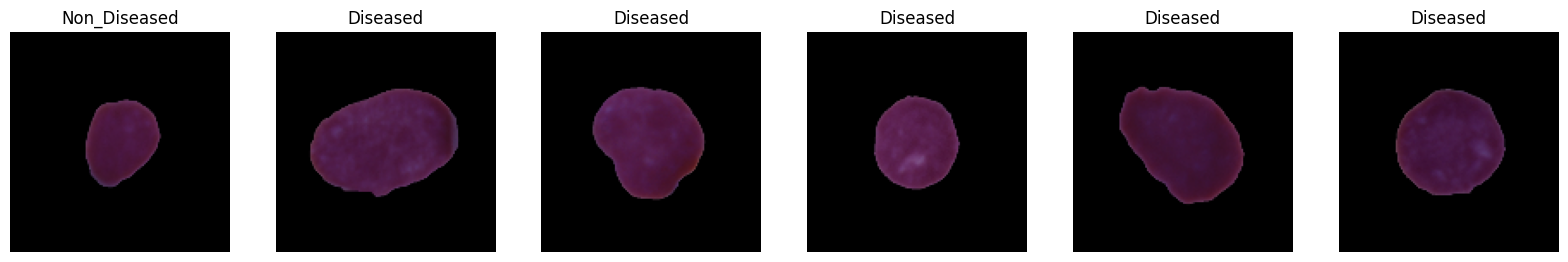

In [7]:
plt.figure(figsize=(20,20))

for n , i in enumerate(list(np.random.randint(0,len(Image),6))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(Image[i])   
    plt.axis('off')
    if Label[i] == 1:
        plt.title('Diseased')
    else:
        plt.title('Non_Diseased')

In [8]:
X_train=Image
y_train=Label

In [9]:
valid_data    = pd.read_csv('../input/leukemia-classification/C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data_labels.csv')

In [10]:
valid_data.head()

,Patient_ID,new_names,labels
0,UID_57_29_1_all.bmp,1.bmp,1
1,UID_57_22_2_all.bmp,2.bmp,1
2,UID_57_31_3_all.bmp,3.bmp,1
3,UID_H49_35_1_hem.bmp,4.bmp,0
4,UID_58_6_13_all.bmp,5.bmp,1


In [11]:
valid_data.shape

(1867, 3)

In [12]:
X_val = []

for image_name in valid_data['new_names']:
    # Loading images
    img = cv2.imread('../input/leukemia-classification/C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data/' + image_name)
    # Resizing 
    img =cv2. resize(img, (128,128))
    # Appending them into list
    X_val.append(img)
    
X_val = np.array(X_val)


y_val = valid_data.labels.values

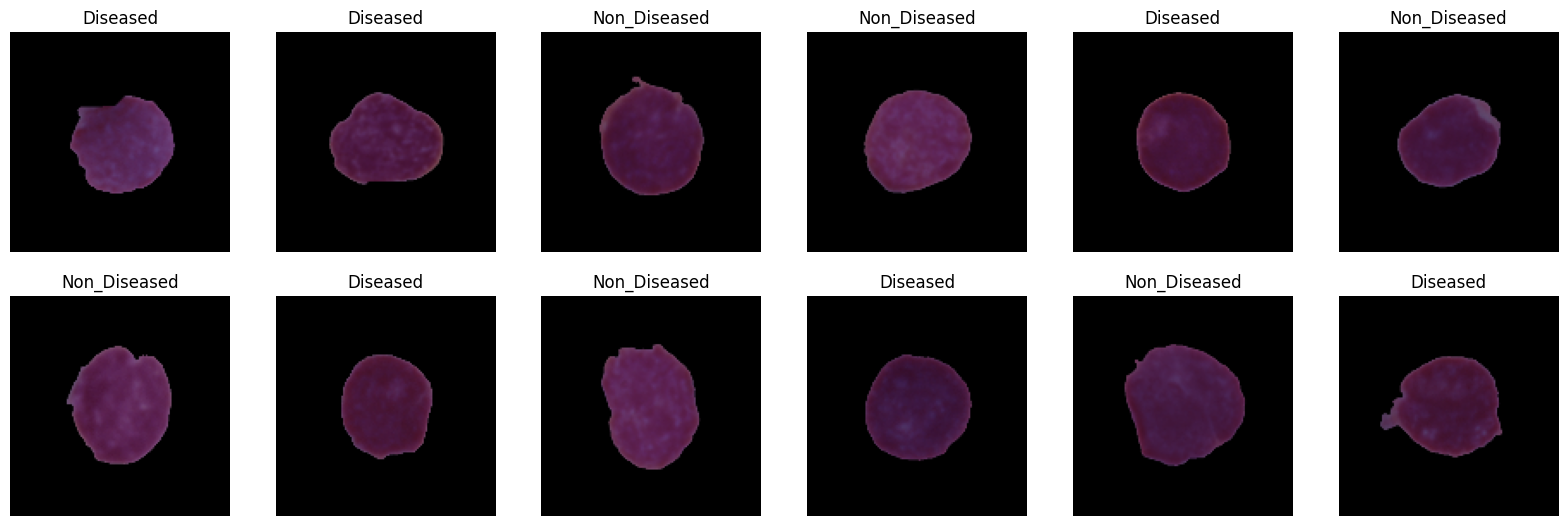

In [13]:
plt.figure(figsize=(20,20))

for n , i in enumerate(list(np.random.randint(0,len(X_val),12))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_val[i])   
    plt.axis('off')
    if y_val[i] == 1:
        plt.title('Diseased')
    else:
        plt.title('Non_Diseased')

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(MaxPooling2D())
Dropout(0.2)
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D())
Dropout(0.2)
model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(512,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(32,activation ="relu"))
model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))

model.add(Dense(1, activation='sigmoid'))
Dropout(0.4)
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       589,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,284,001 (4.90 MB)

 Trainable params: 1,284,001 (4.90 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


from keras.callbacks import ReduceLROnPlateau,EarlyStopping
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',  
                                            verbose=2, 
                                            factor=0.5, 
                                            min_lr=0.00001)
earlystop = EarlyStopping(patience=15)

In [16]:
history = model.fit(X_train,y_train, batch_size=64,
                              epochs = 20, validation_data = (X_val,y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // 128
                              , callbacks=[earlystop,learning_rate_reduction])

Epoch 1/20
83/83 - 123s - 1s/step - accuracy: 0.7822 - loss: 0.6750 - val_accuracy: 0.6947 - val_loss: 0.6347 - learning_rate: 0.0010
Epoch 2/20


/opt/conda/lib/python3.10/site-packages/keras/src/callbacks/callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


83/83 - 119s - 1s/step - accuracy: 0.7974 - loss: 0.4670 - val_accuracy: 0.6942 - val_loss: 0.6831 - learning_rate: 0.0010
Epoch 3/20


/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


83/83 - 13s - 152ms/step - accuracy: 0.7568 - loss: 0.4070 - val_accuracy: 0.6958 - val_loss: 0.6839 - learning_rate: 0.0010
Epoch 4/20
83/83 - 123s - 1s/step - accuracy: 0.8018 - loss: 0.4611 - val_accuracy: 0.6909 - val_loss: 0.7083 - learning_rate: 0.0010
Epoch 5/20
83/83 - 119s - 1s/step - accuracy: 0.8110 - loss: 0.4381 - val_accuracy: 0.6974 - val_loss: 0.6695 - learning_rate: 0.0010
Epoch 6/20
83/83 - 12s - 143ms/step - accuracy: 0.7568 - loss: 0.5147 - val_accuracy: 0.6995 - val_loss: 0.6962 - learning_rate: 0.0010
Epoch 7/20
83/83 - 133s - 2s/step - accuracy: 0.8198 - loss: 0.4199 - val_accuracy: 0.6834 - val_loss: 0.7035 - learning_rate: 0.0010
Epoch 8/20
83/83 - 121s - 1s/step - accuracy: 0.8251 - loss: 0.4103 - val_accuracy: 0.6952 - val_loss: 0.7225 - learning_rate: 0.0010
Epoch 9/20
83/83 - 12s - 146ms/step - accuracy: 0.8649 - loss: 0.3587 - val_accuracy: 0.6958 - val_loss: 0.7657 - learning_rate: 0.0010
Epoch 10/20
83/83 - 120s - 1s/step - accuracy: 0.8276 - loss: 0.411

59/59 ━━━━━━━━━━━━━━━━━━━━ 11s 187ms/step - accuracy: 0.6768 - loss: 0.6882


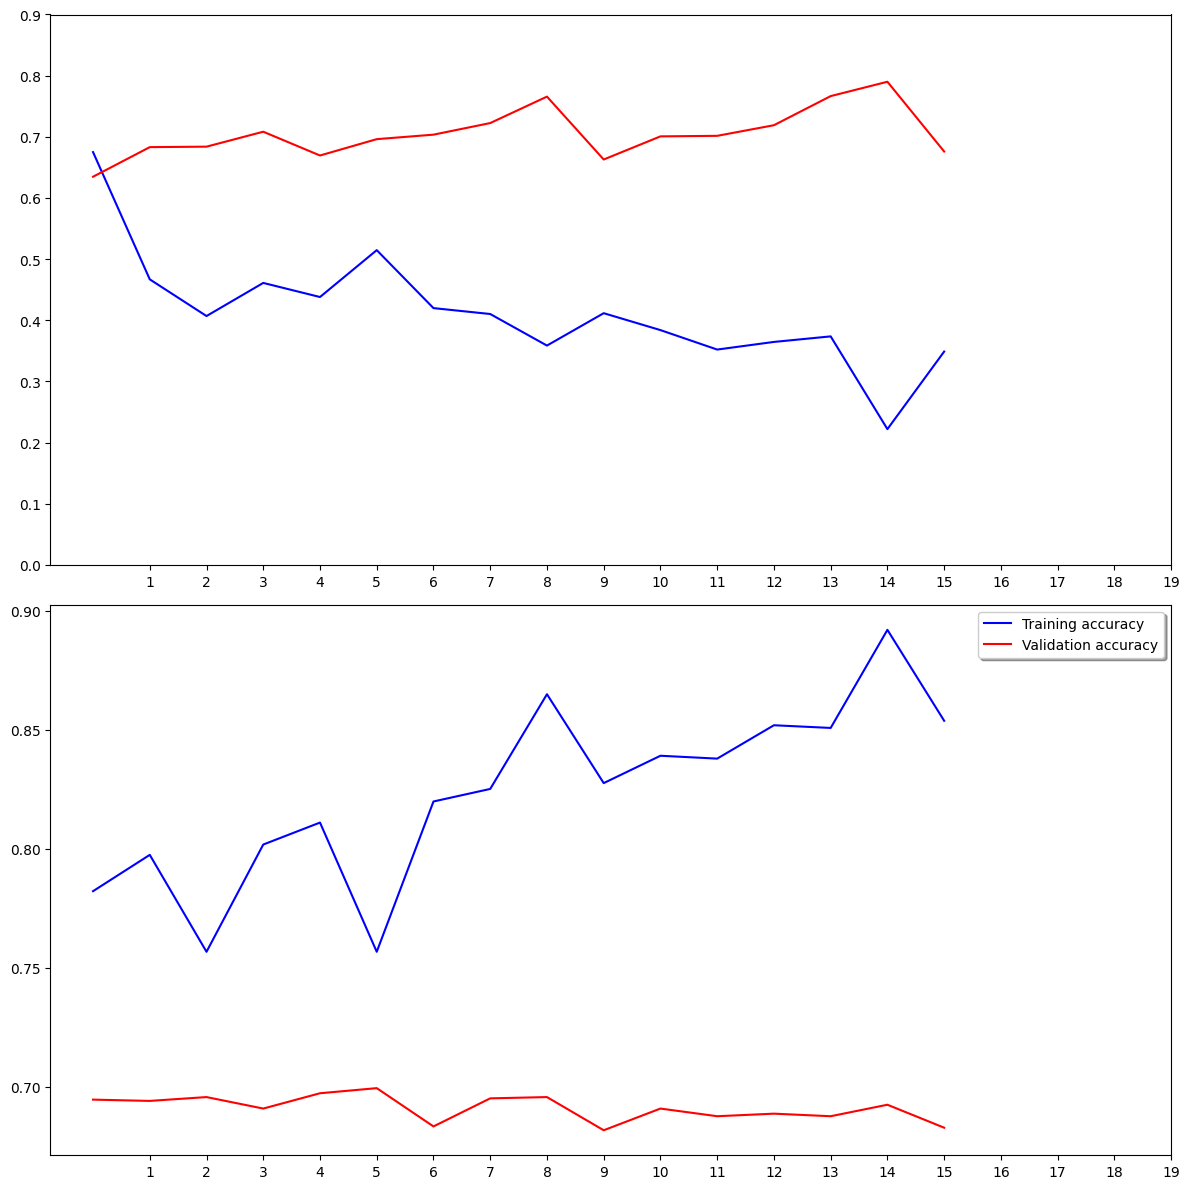

In [17]:
val_Loss, val_Accuracy = model.evaluate(X_val, y_val)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, 20, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, 20, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()